# Lagrangian descriptor and reactive islands from boxed MD trajectories

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lagrangian-descriptor-and-reactive-islands-from-boxed-MD-trajectories" data-toc-modified-id="Lagrangian-descriptor-and-reactive-islands-from-boxed-MD-trajectories-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lagrangian descriptor and reactive islands from boxed MD trajectories</a></span><ul class="toc-item"><li><span><a href="#Compute-LD-using-action-formulation" data-toc-modified-id="Compute-LD-using-action-formulation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Compute LD using action formulation</a></span><ul class="toc-item"><li><span><a href="#Combining-small-files-into-a-single-large-file" data-toc-modified-id="Combining-small-files-into-a-single-large-file-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Combining small files into a single large file</a></span></li></ul></li><li><span><a href="#Visualize-RI-and-LD-obtained-from-boxed-MD" data-toc-modified-id="Visualize-RI-and-LD-obtained-from-boxed-MD-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Visualize RI and LD obtained from boxed MD</a></span><ul class="toc-item"><li><span><a href="#Check-the-computed-LD-data" data-toc-modified-id="Check-the-computed-LD-data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Check the computed LD data</a></span></li><li><span><a href="#Load-the-reactive-islands-computed-directly-for-comparison,-only-for-Hamiltonian-model" data-toc-modified-id="Load-the-reactive-islands-computed-directly-for-comparison,-only-for-Hamiltonian-model-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Load the reactive islands computed directly for comparison, only for Hamiltonian model</a></span></li><li><span><a href="#Plot-LD-values-on-the-box-boundaries-at-constant-$x$-coordinate" data-toc-modified-id="Plot-LD-values-on-the-box-boundaries-at-constant-$x$-coordinate-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Plot LD values on the box boundaries at constant $x$-coordinate</a></span></li></ul></li><li><span><a href="#Plotting-the-hyperbolic-periodic-orbit-and-LD-values" data-toc-modified-id="Plotting-the-hyperbolic-periodic-orbit-and-LD-values-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plotting the hyperbolic periodic orbit and LD values</a></span><ul class="toc-item"><li><span><a href="#Eigenvalue-solver" data-toc-modified-id="Eigenvalue-solver-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Eigenvalue solver</a></span></li></ul></li></ul></li></ul></div>

## Compute LD using action formulation

Obtain forward and backward LD for the initial condition which is the mid point of the trajectory. The mid point is obtained from the time-discretization of the trajectory. Another approach will be to consider the arc-length of the trajectory.

The action formulation of computing Lagrangian descriptor is given by


\begin{equation}
L = \int_{t_0}^{t_0 + \tau} T dt\
\end{equation}


In [7]:
import numpy as np
import time

import computeLD_boxedMDtrajs
import importlib
importlib.reload(computeLD_boxedMDtrajs)

from computeLD_boxedMDtrajs import compute_ld

system_mass = 1.0
bath_mass = 1 # check the filename and folder agrees with this parameter
time_step = 1e-3
total_int_time = 500
# tau = 0.2
# length_traj = int(tau/time_step)

# datapath = '../data/'
# datapath = '/Users/OptimusPrime/Google Drive/systembath2dof-LJrepulsion/Boxed_Trajectories_M0.1/'
datapath = '/Users/OptimusPrime/Google Drive/systembath2dof-LJrepulsion/Langevin/' + \
    'Boxed_LangevinTrj_M1_G5/'

tFlag = 1

filesID = np.array([1, 201], dtype=int)

start_time = time.process_time()
compute_ld(datapath, tFlag, filesID, system_mass, bath_mass, time_step, total_int_time)
end_time = time.process_time()

print('Total execution time %2.6f'%((end_time - start_time)/60) + ' minutes.')



['Finished processing file trj_M1T500_1_n1_0-0.txt and got  2984 trajectories']
['Finished processing file trj_M1T500_1_n2_0-0.txt and got  3281 trajectories']
['Finished processing file trj_M1T500_1_n3_0-0.txt and got  3332 trajectories']
['Finished processing file trj_M1T500_1_n4_0-0.txt and got  5775 trajectories']
['Finished processing file trj_M1T500_1_n5_0-0.txt and got  2101 trajectories']
['Finished processing file trj_M1T500_1_n6_0-0.txt and got  3231 trajectories']
['Finished processing file trj_M1T500_1_n7_0-0.txt and got  2801 trajectories']
['Finished processing file trj_M1T500_1_n8_0-0.txt and got  4068 trajectories']
['Finished processing file trj_M1T500_1_n9_0-0.txt and got  2991 trajectories']
['Finished processing file trj_M1T500_1_n10_0-0.txt and got  3097 trajectories']
['Finished processing file trj_M1T500_1_n11_0-0.txt and got  3108 trajectories']
['Finished processing file trj_M1T500_1_n12_0-0.txt and got  3337 trajectories']
['Finished processing file trj_M1T500

### Combining small files into a single large file

In [15]:
# ld_sampling1 = np.loadtxt('ld_combined_trj_M1T1000_1_n100_0-0.txt')
# ld_sampling2 = np.loadtxt('ld_combined_trj_M1T1000_1_n200_0-0.txt')
# ld_sampling = np.append(ld_sampling1, ld_sampling2, axis = 0)
# ld_sampling3 = np.loadtxt('ld_combined_trj_M1T1000_-1_n99_0-0.txt')
# np.savetxt('ld_combined_trj_M1T1000_1_n200_0-0.txt', ld_sampling)


## Visualize RI and LD obtained from boxed MD

In [8]:
import numpy as np
# import vaex
import pandas as pd

from matplotlib import cm
import matplotlib as mpl
import matplotlib.pyplot as plt

# https://matplotlib.org/stable/tutorials/text/usetex.html
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
# It's also possible to use the reduced notation by directly setting font.family:
# plt.rcParams.update({
#   "text.usetex": True,
#   "font.family": "Helvetica"
# })

from scipy.integrate import trapz

import solutesolventLJ2dof
import importlib
importlib.reload(solutesolventLJ2dof)


<module 'solutesolventLJ2dof' from '/Users/OptimusPrime/Documents/reaction-dynamics/solvent-solute-2dof/source/solutesolventLJ2dof.py'>

### Check the computed LD data

Some sanity checks to see if the trajectories behave as expected in the boxed MD

(667712, 5)


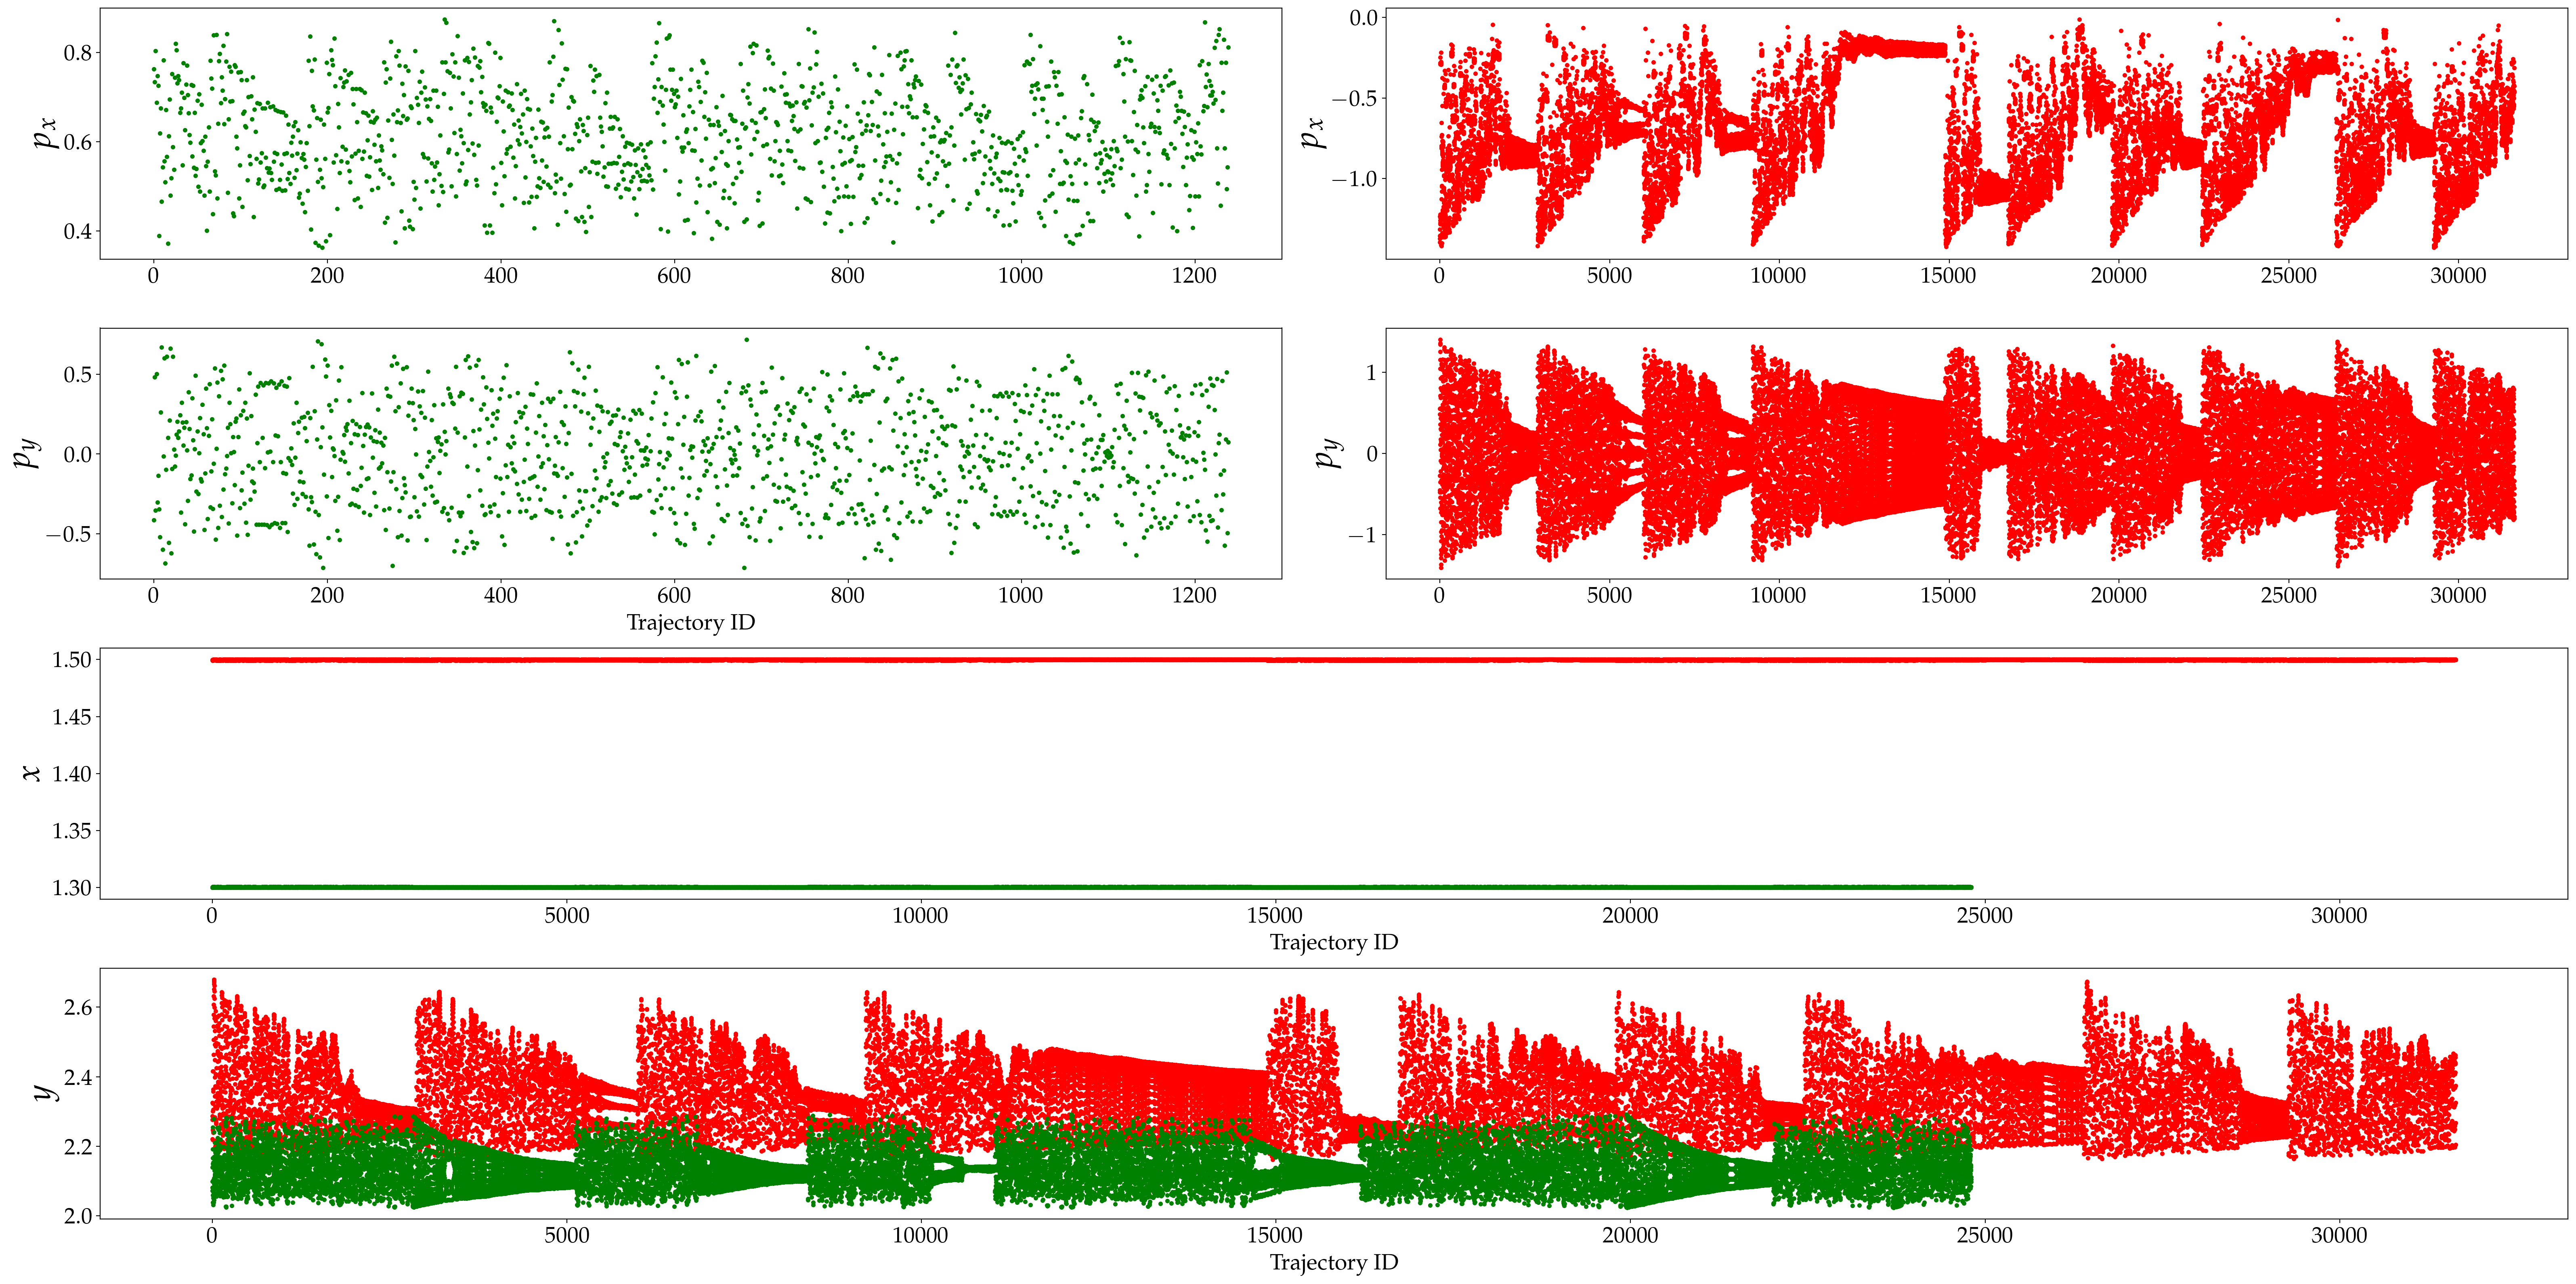

In [13]:
import matplotlib.gridspec as gridspec

tick_labelsize = 20 #10, 20
axes_labelsize = 20
mpl.rcParams['xtick.labelsize'] = tick_labelsize
mpl.rcParams['ytick.labelsize'] = tick_labelsize
mpl.rcParams['axes.labelsize'] = axes_labelsize

printFlag = True

tFlag = 1 # 1: forward LD, -1: backward LD
system_mass = 1.0
bath_mass = 1
gamma = 5.0
# datapath = '../data/ld_boxedmdtrajs/hamiltonian/'
datapath = './'
ld_sampling = np.loadtxt(datapath + 'ld_combined_trj_M1T500_' + str(tFlag) + \
                         '_n200_0-0_Boxed_LangevinTrj_M1_G5.txt')
# ld_sampling = np.loadtxt(datapath + 'ld_combined_trj_M' + str(bath_mass) \
#                          + 'T1000_' + str(tFlag) + '_n200_0-0.txt')

# ld_sampling1 = np.loadtxt('ld_combined_trj_M0.1T1000_1_n99_0-0.txt')
# ld_sampling2 = np.loadtxt('ld_combined_trj_M0.1T1000_1_n400_0-0.txt')
# ld_sampling = np.append(ld_sampling1, ld_sampling2)
# ld_sampling3 = np.loadtxt('ld_combined_trj_M1T1000_-1_n99_0-0.txt')

data_shape = print(np.shape(ld_sampling))

if tFlag == -1:
    # Backward LD
    idx_px_neg = np.where((ld_sampling[:,2] < 0) & (np.abs(ld_sampling[:,0] - 1.3) < 1e-3))
    idx_px_pos = np.where((ld_sampling[:,2] > 0) & (np.abs(ld_sampling[:,0] - 1.5) < 1e-3))
elif tFlag == 1:
    # Forward LD
    idx_px_pos = np.where((ld_sampling[:,2] > 0) & (np.abs(ld_sampling[:,0] - 1.3) < 1e-3))
    idx_px_neg = np.where((ld_sampling[:,2] < 0) & (np.abs(ld_sampling[:,0] - 1.5) < 1e-3))

# print(ld_sampling[idx_px_neg[0][1:10],:], ld_sampling[idx_px_pos[0][1:10],:], sep = "\n \n")

len_to_plot = int(len(idx_px_pos[0])/20)

# fig = plt.figure(figsize=(16,8), dpi = 100)
# ax = fig.add_subplot(121)

fig = plt.figure(tight_layout=True, figsize=(32,16), dpi = 200)
gs = gridspec.GridSpec(4, 2)

ax = fig.add_subplot(gs[0, 0])
ax.plot(ld_sampling[idx_px_pos[0][1:len_to_plot],2], '.g')
ax.set_ylabel(r'$p_x$', fontsize = 30)

ax = fig.add_subplot(gs[1, 0])
ax.plot(ld_sampling[idx_px_pos[0][1:len_to_plot],3], '.g')
ax.set_ylabel(r'$p_y$', fontsize = 30)
ax.set_xlabel('Trajectory ID')


ax = fig.add_subplot(gs[0, 1])
len_to_plot = int(len(idx_px_neg[0])/20)
ax.plot(ld_sampling[idx_px_neg[0][1:len_to_plot],2], '.r')
ax.set_ylabel(r'$p_x$', fontsize = 30)

ax = fig.add_subplot(gs[1, 1])
ax.plot(ld_sampling[idx_px_neg[0][1:len_to_plot],3], '.r')
ax.set_ylabel(r'$p_y$', fontsize = 30)

# make this plot with normalised values and raindrops shape

# fig = plt.figure(figsize=(16,8), dpi = 100)
# ax = fig.add_subplot(111)
ax = fig.add_subplot(gs[2, :])
ax.plot(ld_sampling[idx_px_neg[0][1:len_to_plot],0],'.r')
ax.plot(ld_sampling[idx_px_pos[0][1:len_to_plot],0],'.g')
ax.set_ylabel(r'$x$', fontsize = 30)
ax.set_xlabel('Trajectory ID')

ax = fig.add_subplot(gs[3, :])
ax.plot(ld_sampling[idx_px_neg[0][1:len_to_plot],1],'.r')
ax.plot(ld_sampling[idx_px_pos[0][1:len_to_plot],1],'.g')
ax.set_ylabel(r'$y$', fontsize = 30)
ax.set_xlabel('Trajectory ID')

if printFlag:
    if tFlag == 1:
        plt.savefig('phasespacecoords_subsample_forward_M' + str(bath_mass) \
                    + 'T' + str(total_int_time) + '_G' + str(gamma) + '.png', \
                    dpi = 200, bbox_inches = 'tight')
    elif tFlag == -1:
        plt.savefig('phasespacecoords_subsample_backward_M' + str(bath_mass) \
                     + 'T' + str(total_int_time) + '_G' + str(gamma) + '.png', \
                    dpi = 200, bbox_inches = 'tight')
    
plt.show()


### Load the reactive islands computed directly for comparison, only for Hamiltonian model

In [25]:

# %matplotlib

# xVec = np.linspace(min(sample_traj[:,0]), max(sample_traj[:,0]), numpts)
# yVec = np.linspace(min(sample_traj[:,1]), max(sample_traj[:,1]), numpts)
# pe_min = -10
# pe_max = 10

# fig_traj = plt.figure(figsize=(6,6))
# ax_traj = fig_traj.gca()
# plot_PE_contours(xVec, yVec, pe_min, pe_max, coeff_pe, ax_traj)
# ax_traj.plot(sample_traj[:,1], sample_traj[:,0])


datapath = './tube-manifolds/'
sBotFilename = 'xeU1_stable_branch-1_eqPt2_solventmass1_deltaE0.21905.txt'
sTopFilename = 'xeU1_stable_branch1_eqPt2_solventmass1_deltaE0.21905.txt'
uBotFilename = 'xeU1_unstable_branch-1_eqPt2_solventmass1_deltaE0.21905.txt'
uTopFilename = 'xeU1_unstable_branch1_eqPt2_solventmass1_deltaE0.21905.txt'

smaniBot = np.loadtxt(datapath + sBotFilename)
smaniTop = np.loadtxt(datapath + sTopFilename)
umaniBot = np.loadtxt(datapath + uBotFilename)
umaniTop = np.loadtxt(datapath + uTopFilename)


### Plot LD values on the box boundaries at constant $x$-coordinate 

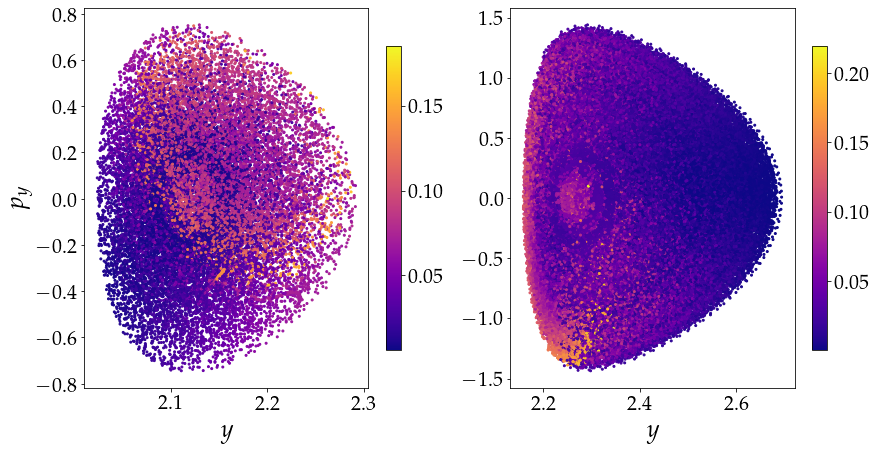

In [12]:
tick_labelsize = 20 #10, 20
axes_labelsize = 20
mpl.rcParams['xtick.labelsize'] = tick_labelsize
mpl.rcParams['ytick.labelsize'] = tick_labelsize
mpl.rcParams['axes.labelsize'] = axes_labelsize

colormap = 'plasma'
printFlag = True

fig_ypy, axs = plt.subplots(1,2, figsize=(14, 7))
ax1, ax2 = axs

if tFlag == 1:    
    idx_px_pos = np.where((ld_sampling[:,2] > 0) & (np.abs(ld_sampling[:,0] - 1.3) < 1e-3))
    ax_px_pos = ax1.scatter(ld_sampling[idx_px_pos,1], ld_sampling[idx_px_pos,3], s = 4, c = ld_sampling[idx_px_pos,4], cmap = colormap)
    # ax_px_pos = ax1.scatter(ld_sampling[idx_px_pos,0], ld_sampling[idx_px_pos,2], s = 4, c = ld_sampling[idx_px_pos,4], cmap = 'plasma')
    # ax1.plot(smaniBot[:,1],smaniBot[:,3],'--b', lw = 3)
    fig_ypy.colorbar(ax_px_pos, ax = ax1, shrink = 0.8)
    ax1.set_xlabel(r'$y$', fontsize = 25)
    ax1.set_ylabel(r'$p_y$', fontsize = 25)
    ax1.text(0.97*np.max(ld_sampling[idx_px_pos,1]),0.95*np.max(ld_sampling[idx_px_pos,3]),r'$x = 1.3$', fontsize = 25)

    idx_px_neg = np.where((ld_sampling[:,2] < 0) & (np.abs(ld_sampling[:,0] - 1.5) < 1e-3))
    ax_px_neg = ax2.scatter(ld_sampling[idx_px_neg,1], ld_sampling[idx_px_neg,3], s = 4, c = ld_sampling[idx_px_neg,4], cmap = colormap)
    # ax_px_neg = ax2.scatter(ld_sampling[idx_px_neg,0], ld_sampling[idx_px_neg,2], s = 4, c = ld_sampling[idx_px_neg,4], cmap = 'plasma')
    # ax2.plot(smaniTop[:,1],smaniTop[:,3],'--b', lw = 3)
    fig_ypy.colorbar(ax_px_neg, ax = ax2, shrink = 0.8)
    ax2.set_xlabel(r'$y$', fontsize = 25)
    # ax2.text(0.95*np.max(ld_sampling[idx_px_neg,1]),0.95*np.max(ld_sampling[idx_px_neg,3]),r'$x = 1.5$', fontsize = 25)
else:
    idx_px_neg = np.where((ld_sampling[:,2] < 0) & (np.abs(ld_sampling[:,0] - 1.3) < 1e-3))
    ax_px_neg = ax1.scatter(ld_sampling[idx_px_neg,1], ld_sampling[idx_px_neg,3], s = 4, c = ld_sampling[idx_px_neg,4], cmap = colormap)
    # ax_px_neg = ax2.scatter(ld_sampling[idx_px_neg,0], ld_sampling[idx_px_neg,2], s = 4, c = ld_sampling[idx_px_neg,4], cmap = 'plasma')
#     ax1.plot(umaniBot[:,1],umaniBot[:,3],'--r', lw = 3)
    fig_ypy.colorbar(ax_px_neg, ax = ax2, shrink = 0.8)
    ax1.set_xlabel(r'$y$', fontsize = 25)
    ax1.set_ylabel(r'$p_y$', fontsize = 25)
#     ax1.text(2.22,0.7,r'$x = 1.3$', fontsize = 20)
    
    idx_px_pos = np.where((ld_sampling[:,2] > 0) & (np.abs(ld_sampling[:,0] - 1.5) < 1e-3))
    ax_px_pos = ax2.scatter(ld_sampling[idx_px_pos,1], ld_sampling[idx_px_pos,3], s = 4, c = ld_sampling[idx_px_pos,4], cmap = colormap)
    # ax_px_pos = ax1.scatter(ld_sampling[idx_px_pos,0], ld_sampling[idx_px_pos,2], s = 4, c = ld_sampling[idx_px_pos,4], cmap = 'plasma')
#     ax2.plot(umaniTop[:,1],umaniTop[:,3],'--r', lw = 3)
    fig_ypy.colorbar(ax_px_pos, ax = ax1, shrink = 0.8)
    ax2.set_xlabel(r'$y$', fontsize = 25)
#     ax2.text(2.55,1.3,r'$x = 1.5$', fontsize = 20)

    
if printFlag:
    if tFlag == 1:
        plt.savefig('forwardld_unstable_boxboundaries_M' + str(bath_mass) + \
                    'T' + str(total_int_time) + '_G' + str(gamma) + '.png', \
                    dpi = 200, bbox_inches = 'tight')
    elif tFlag == -1:
        plt.savefig('backwardld_stable_boxboundaries_M' + str(bath_mass) + \
                    'T' + str(total_int_time) + '_G' + str(gamma) + '.png', \
                    dpi = 200, bbox_inches = 'tight')
# 
# 



## Plotting the hyperbolic periodic orbit and LD values

The periodic orbits are obtained from two different approaches and compared with the singular values of LD

In [ ]:
# plt.scatter(ld_sampling[:,1], ld_sampling[:,0], s = ld_sampling[:,4])
# plt.colorbar()

%matplotlib
from scipy.integrate import solve_ivp
from functools import partial

import solutesolventLJ2dof
import importlib
importlib.reload(solutesolventLJ2dof)

mu1 = 1.0
solvent_mass = 1.0
rel_tol = 3e-14
abs_tol = 1e-14

numpts = 500
r1Vec = np.linspace(0.75, 2.25, numpts)
r2Vec = np.linspace(1.25, 4.75, numpts)
r1Mesh, r2Mesh = np.meshgrid(r1Vec, r2Vec)
coeff_pe = [321.904484, -995.713452, 1118.689753, -537.856726, \
            92.976121, 1.0, 1.0, 0.01]
pe_surf = solutesolventLJ2dof.potential_energy(r1Mesh, r2Mesh, coeff_pe)
if coeff_pe[-1] != 0: # when c_8 is non zero, mask portion of the plot
    pe_surf = np.ma.masked_where(((r1Mesh > 1.8)&(r2Mesh < 1.8)), pe_surf) 

    
upo_init_conds = np.zeros((1,6))
data_path_upos = '../data/upos-manifolds/'
file_name = 'x0po_T_energyPO_eqPt2mass_solvent%.0f'%(solvent_mass) \
                    + '_DelE0.21872_solutesolventLJ2dof.txt'
upo_init_conds[0,:] = np.loadtxt(data_path_upos + file_name)

timespan = [0, 2*upo_init_conds[0,4]]
parameters = np.append([mu1, solvent_mass],coeff_pe)
odes_func = partial(solutesolventLJ2dof.vector_field, parameters)
sol = solve_ivp(odes_func, timespan, upo_init_conds[0,:4], dense_output = True, \
                rtol = rel_tol, atol = abs_tol)
    
upo = np.loadtxt('po2.txt')

fig_ld = plt.figure(figsize=(10,10))
ax_ld = fig_ld.gca()
for index in range(240):
    filename = "trj_M1T1000_-1_n" + str(index) + "_0-0.txt"
    ld_sampling = np.loadtxt('ld_' + filename)
    
    plt.scatter(ld_sampling[:,1], ld_sampling[:,0], s = 3, c = ld_sampling[:,4])
    plt.contour(r2Mesh, r1Mesh, pe_surf, levels = [3.691966889], \
                colors='k', linewidths = 2.0)

    ax_ld.plot(sol.y[1,:], sol.y[0,:], '-b', linewidth = 4)
    ax_ld.plot(upo[:,2], upo[:,1], '-.r', lw = 2)
    ax_ld.set_ylabel(r'$r_1$', labelpad = 15, rotation = 0)
    ax_ld.set_xlabel(r'$r_2$', labelpad = 5)



plt.ylim([1.34, 1.41])
plt.xlim([2.1, 2.3])   
# plt.colorbar()
# plt.savefig('temp.png', dpi = 300, bbox_inches = 'tight')


In [ ]:

# boxed_trajectory = vaex.from_ascii("../data/BoxedDyn/" + \
#                                   "trj_M1T200_-1_n0_0-0.txt", \
#                                   names=["r1", "r2", "p1", "p2"])
# boxed_trajectory = np.loadtxt("../data/BoxedDyn/" + \
#                                   "trj_M1T200_-1_n0_0-0.txt")

# datapath = '/Users/OptimusPrime/Google Drive/systembath2dof-LJrepulsion/Boxed_Trajectories/'

for index in range(400):
    traj_filename = "trj_M1T200_-1_n" + str(index) + "_0-0.txt"

    traj = np.array([])
    with open(datapath + traj_filename) as fp:
        for line in fp:
            if line == '\n':
                break

            traj = np.append(traj,pd.to_numeric(line.strip().split()))
        
        
        
traj = np.reshape(traj,(int(len(traj)/4),4),'C')


Look at trajectories that cross the saddle by going from one bound to another.

### Eigenvalue solver 

In [26]:
import numpy.linalg as nl

# jacobianEomEquil = [[-0.0795267, -0.153816, -1.59107*10**-9, -1.00335*10**-9],
#        [0.153816, 0.0795267, 1.59107*10**-9, -1.00335*10**-9],
#        [1.19103*10**-18, -1.19103*10**-18, -3.49686*10**-34, 1.],
#        [-8.27267*10**-10, -8.27267*10**-10, 0.124572, 0.]]
jacobianEomEquil = np.array([[0, 0.00150503, 0, 0],
                   [0.0319136, 0, 0, 0],
                   [0, 0, 0, 1],
                   [0, 0, 0.124572, 0]])
jacobianEomEquil[0][1] = 0.0000475931
jacobianEomEquil[1][0] = 0.0010092
nl.eig(jacobianEomEquil)

(array([ 2.19159660e-04, -2.19159660e-04,  3.52947588e-01, -3.52947588e-01]),
 array([[ 0.21221546, -0.21221546,  0.        ,  0.        ],
        [ 0.9772229 ,  0.9772229 ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.94298844, -0.94298844],
        [ 0.        ,  0.        ,  0.33282549,  0.33282549]]))